In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix,classification_report
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path="C:/Users/Cash/Downloads/Rice_Image_Dataset (1)/Rice_Image_Dataset/"

data_images=[]
data_labels=[]
for i in os.listdir(data_path):
    full_path=os.path.join(data_path+i)
    if(os.path.isdir(full_path)):
        for rice_image in os.listdir(full_path):
            data_images.append(full_path+"/"+rice_image)
            data_labels.append(i)

In [3]:
df=pd.DataFrame({"label":data_labels,"image":data_images})
df.head(1)

,label,image
0,Arborio,C:/Users/Cash/Downloads/Rice_Image_Dataset (1)...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   75000 non-null  object
 1   image   75000 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [5]:
df.nunique()

label        5
image    75000
dtype: int64

In [6]:
df_num=df.value_counts(subset="label").reset_index()
df_num

,label,count
0,Arborio,15000
1,Basmati,15000
2,Ipsala,15000
3,Jasmine,15000
4,Karacadag,15000


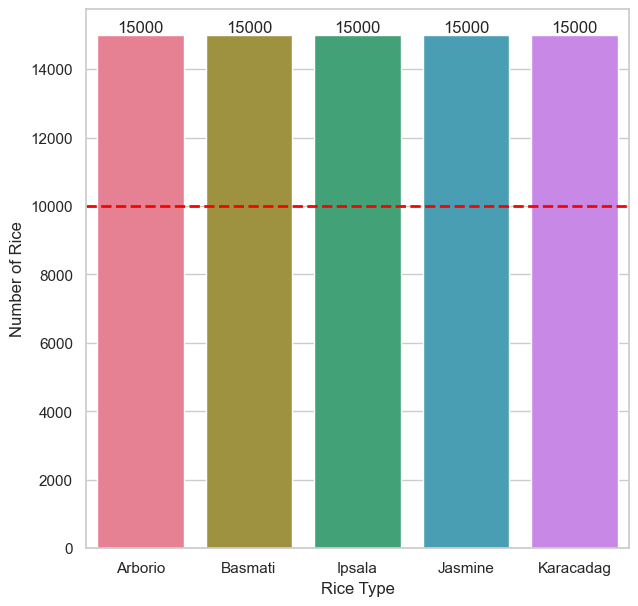

In [7]:
#Dataset Visualization

plt.figure(figsize=(7,7))

sns.set_theme(style="whitegrid")

ax=sns.barplot(data=df_num, x="label",y="count",palette="husl",saturation=0.75)
plt.axhline(y=10000, color='red', linestyle='--', linewidth=2)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
plt.xlabel("Rice Type")
plt.ylabel("Number of Rice")
plt.show()

In [8]:
df_num["label"]

0      Arborio
1      Basmati
2       Ipsala
3      Jasmine
4    Karacadag
Name: label, dtype: object

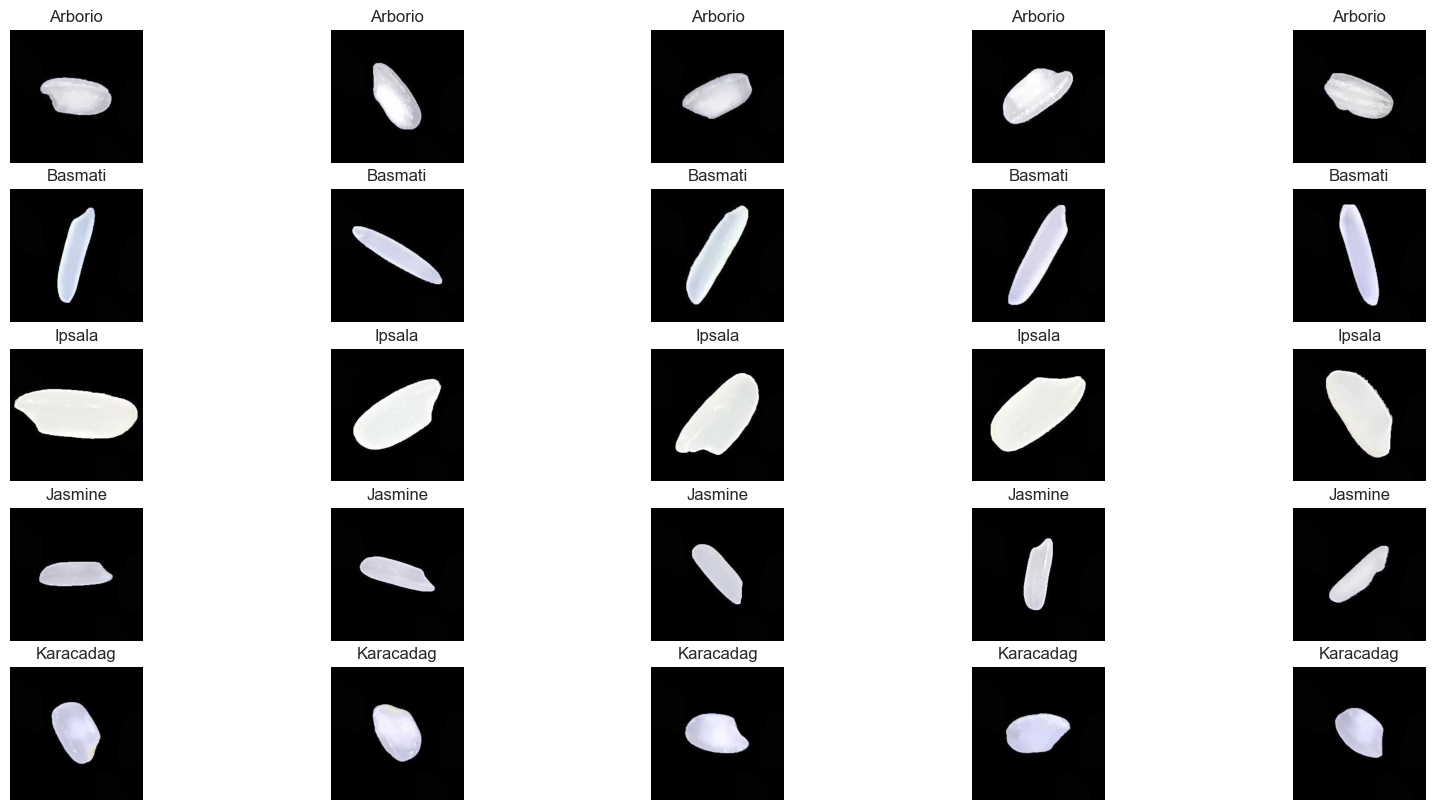

In [9]:
import keras.utils as image
fig=plt.figure(figsize=(20,10))
count=0
for j in range(5):
    for i in range(5):
        ax=fig.add_subplot(5,5,j*5+1+i,xticks=[],yticks=[])

        plt.title(df_num["label"].iloc[j])
        all_files=os.listdir(data_path+df_num["label"].iloc[j])
        plt.axis("off")

        first_image_name=all_files[i]
        ax.imshow(image.load_img(data_path+df_num["label"].iloc[j]+"/"+first_image_name))

plt.show()

In [10]:
df.head()

,label,image
0,Arborio,C:/Users/Cash/Downloads/Rice_Image_Dataset (1)...
1,Arborio,C:/Users/Cash/Downloads/Rice_Image_Dataset (1)...
2,Arborio,C:/Users/Cash/Downloads/Rice_Image_Dataset (1)...
3,Arborio,C:/Users/Cash/Downloads/Rice_Image_Dataset (1)...
4,Arborio,C:/Users/Cash/Downloads/Rice_Image_Dataset (1)...


In [11]:
#Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.1, random_state=42)
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (67500,)
x_test shape:  (7500,)
y_train shape:  (67500,)
y_test shape:  (7500,)


In [12]:
#Train-Validation Split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print("x_train shape: ",x_train.shape)
print("x_val shape: ",x_val.shape)
print("y_train shape: ",y_train.shape)
print("y_val shape: ",y_val.shape)

x_train shape:  (54000,)
x_val shape:  (13500,)
y_train shape:  (54000,)
y_val shape:  (13500,)


In [13]:
df_train= pd.DataFrame({'image': x_train, 'label': y_train})
df_val = pd.DataFrame({'image': x_val, 'label': y_val})
df_test = pd.DataFrame({'image': x_test, 'label': y_test})
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(54000, 2)
(13500, 2)
(7500, 2)


In [14]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [15]:
df_test

,image,label
26837,C:/Users/Cash/Downloads/Rice_Image_Dataset (1)...,Basmati
2592,C:/Users/Cash/Downloads/Rice_Image_Dataset (1)...,Arborio
18359,C:/Users/Cash/Downloads/Rice_Image_Dataset (1)...,Basmati
73292,C:/Users/Cash/Downloads/Rice_Image_Dataset (1)...,Karacadag
60127,C:/Users/Cash/Downloads/Rice_Image_Dataset (1)...,Karacadag
...,...,...
36682,C:/Users/Cash/Downloads/Rice_Image_Dataset (1)...,Ipsala
52710,C:/Users/Cash/Downloads/Rice_Image_Dataset (1)...,Jasmine
42507,C:/Users/Cash/Downloads/Rice_Image_Dataset (1)...,Ipsala
4162,C:/Users/Cash/Downloads/Rice_Image_Dataset (1)...,Arborio


In [16]:
#Image Augmentation
image_size = (50, 50,3)
batch_size = 32

In [17]:
train_datagen=ImageDataGenerator(rescale=1./255,
                          rotation_range=25,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True
                        )

val_datagen=ImageDataGenerator(rescale=1./255,
                          rotation_range=25,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True
                          
                        )

train_generator=train_datagen.flow_from_dataframe(df_train,
                                           x_col="image",
                                           y_col="label",
                                           target_size=image_size[:2],
                                           batch_size=batch_size,
                                           class_mode="categorical",
                                           shuffle=True)

val_generator=val_datagen.flow_from_dataframe(df_val,
                                         x_col="image",
                                         y_col="label",
                                         target_size=image_size[:2],
                                         batch_size=batch_size,
                                         class_mode="categorical",
                                         shuffle=False)

test_generator=val_datagen.flow_from_dataframe(df_test,
                                         x_col="image",
                                         y_col="label",
                                         target_size=image_size[:2],
                                         batch_size=batch_size,
                                         class_mode="categorical",
                                         shuffle=False)

Found 54000 validated image filenames belonging to 5 classes.
Found 13500 validated image filenames belonging to 5 classes.
Found 7500 validated image filenames belonging to 5 classes.


In [18]:
numberOfClasses=df_train["label"].value_counts().count()
numberOfClasses

5

In [32]:
#Create CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=image_size))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(numberOfClasses, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 7744)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [33]:
history=model.fit_generator(generator=train_generator,
                           epochs=5,
                           validation_data=val_generator,
                           shuffle=True)

Epoch 1/5
1688/1688 [==============================] - 382s 225ms/step - loss: 0.3612 - accuracy: 0.8574 - val_loss: 0.1661 - val_accuracy: 0.9391
Epoch 2/5
1688/1688 [==============================] - 387s 230ms/step - loss: 0.1603 - accuracy: 0.9410 - val_loss: 0.1612 - val_accuracy: 0.9413
Epoch 3/5
1688/1688 [==============================] - 378s 224ms/step - loss: 0.1169 - accuracy: 0.9574 - val_loss: 0.1024 - val_accuracy: 0.9637
Epoch 4/5
1688/1688 [==============================] - 377s 223ms/step - loss: 0.0941 - accuracy: 0.9664 - val_loss: 0.0772 - val_accuracy: 0.9737
Epoch 5/5
1688/1688 [==============================] - 376s 223ms/step - loss: 0.0825 - accuracy: 0.9702 - val_loss: 0.0486 - val_accuracy: 0.9828


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


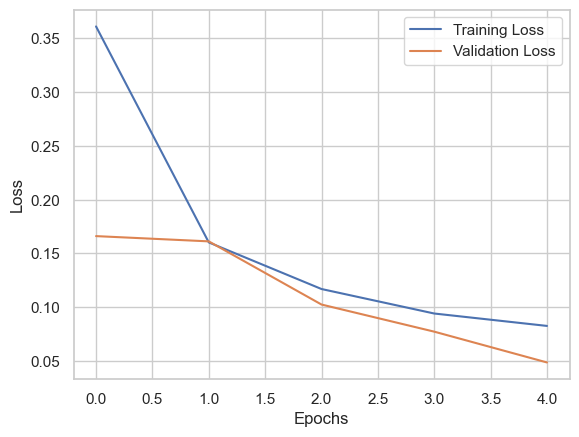

In [34]:
# Access training history
print(history.history.keys())


# Visualize training and validation loss over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


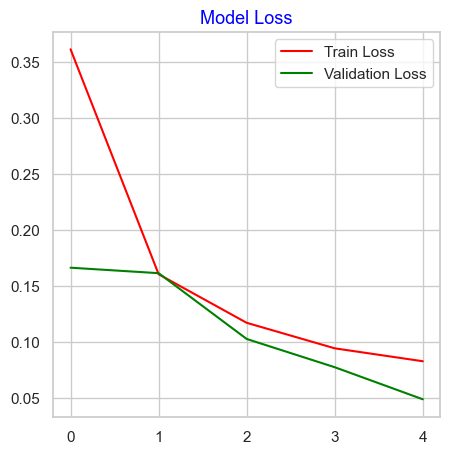

In [35]:
plt.figure(figsize=(5,5))
plt.plot(history.history["loss"],label = "Train Loss", color = "red")
plt.plot(history.history["val_loss"],label = "Validation Loss",color = "green")
plt.title("Model Loss", color = "blue", size = 13)
plt.legend()
plt.show()

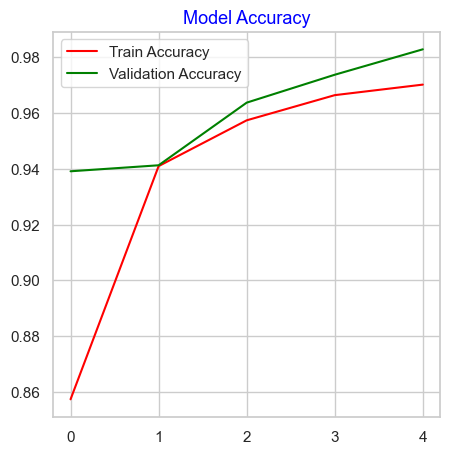

In [36]:
plt.figure(figsize=(5,5))
plt.plot(history.history["accuracy"],label = "Train Accuracy", color = "red")
plt.plot(history.history["val_accuracy"],label = "Validation Accuracy", color = "green")
plt.title("Model Accuracy", color = "blue", size = 13)
plt.legend()
plt.show()

In [37]:
#Model Accuracy With Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report

y_pred=model.predict(test_generator)

y_pred_classes=np.argmax(y_pred,axis=1)

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)

print(classification_report(y_true, y_pred_classes))


235/235 [==============================] - 33s 140ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1522
           1       0.99      0.99      0.99      1537
           2       1.00      1.00      1.00      1522
           3       0.98      0.98      0.98      1456
           4       1.00      0.98      0.99      1463

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



In [38]:
rice_names=df_test["label"].unique()
rice_names

array(['Basmati', 'Arborio', 'Karacadag', 'Ipsala', 'Jasmine'],
      dtype=object)

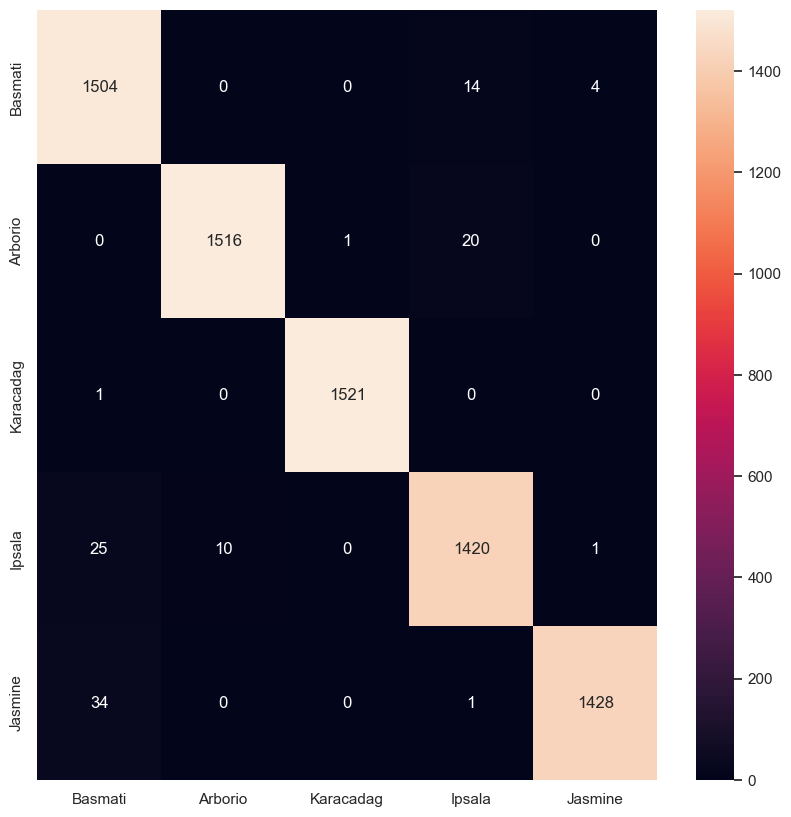

In [39]:
rice_names=df_test["label"].unique()

f,ax=plt.subplots(figsize=(10,10))

sns.heatmap(cm,annot=True,fmt=".0f")

ax.set_xticklabels(rice_names)

ax.set_yticklabels(rice_names)

plt.show()

In [40]:
metrics = model.evaluate(test_generator)
# Print the accuracy of the model
print('Accuracy:', metrics[1])

235/235 [==============================] - 33s 139ms/step - loss: 0.0495 - accuracy: 0.9845
Accuracy: 0.9845333099365234


235/235 [==============================] - 34s 143ms/step


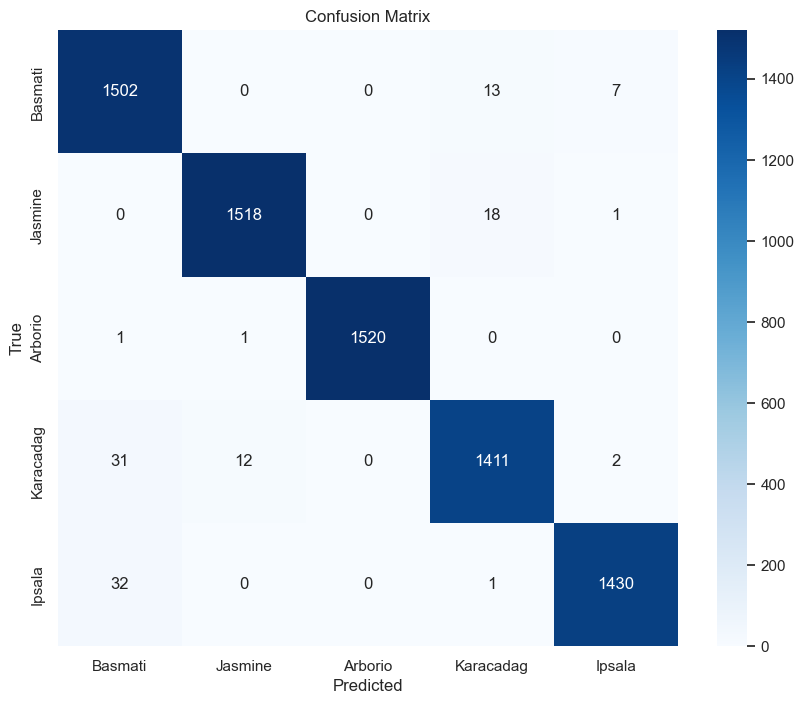

              precision    recall  f1-score   support

     Basmati       0.96      0.99      0.97      1522
     Jasmine       0.99      0.99      0.99      1537
     Arborio       1.00      1.00      1.00      1522
   Karacadag       0.98      0.97      0.97      1456
      Ipsala       0.99      0.98      0.99      1463

    accuracy                           0.98      7500
   macro avg       0.98      0.98      0.98      7500
weighted avg       0.98      0.98      0.98      7500



In [54]:
# Assuming you have already defined your model and test_generator

# Predict classes for test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true classes
y_true = test_generator.classes

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Define class names
class_names = df_train['label'].unique()

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=class_names))


In [53]:
#predition

# Define the path to your image
image_path = "C:/Users/Cash/Downloads/Rice_Image_Dataset (1)/Rice_Image_Dataset/Karacadag/Karacadag (999).jpg"   

# Load and preprocess the image
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image and resize it to the required dimensions
img = image.load_img(image_path, target_size=(50, 50))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image (normalize pixel values)
img_array = img_array / 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(predictions)

# Get the class label
class_labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
predicted_label = class_labels[predicted_class]

# Print the predicted label
print("Predicted Label:", predicted_label)


1/1 [==============================] - 0s 44ms/step
Predicted Label: Karacadag


In [52]:
# Load and preprocess the input image for prediction
from tensorflow.keras.preprocessing import image

# Load an image for prediction
image_path = "C:/Users/Cash/Downloads/Rice_Image_Dataset (1)/Rice_Image_Dataset/Arborio/Arborio (9992).jpg" 
img = image.load_img(image_path, target_size=(50, 50))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image

# Make predictions
predictions = model.predict(img)
predicted_class = np.argmax(predictions)

# Decode the predicted class
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

# Print the predicted label
print(f"The predicted rice variety is: {predicted_label}")


1/1 [==============================] - 0s 49ms/step
The predicted rice variety is: Arborio


In [55]:
#save and load model

# Save the model architecture and weights to files
model.save('rice_classification_model.h5')

# Save the label encoder for later use
import joblib
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [56]:
from tensorflow.keras.models import load_model

# Load the model architecture and weights
loaded_model = load_model('rice_classification_model.h5')

# Load the label encoder
loaded_label_encoder = joblib.load('label_encoder.pkl')
